In [1]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('hepatitisC.csv')

# Mostrar las primeras filas del dataframe para entender la estructura
print(data.head())
print(data.info())
print(data.describe())


   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   A

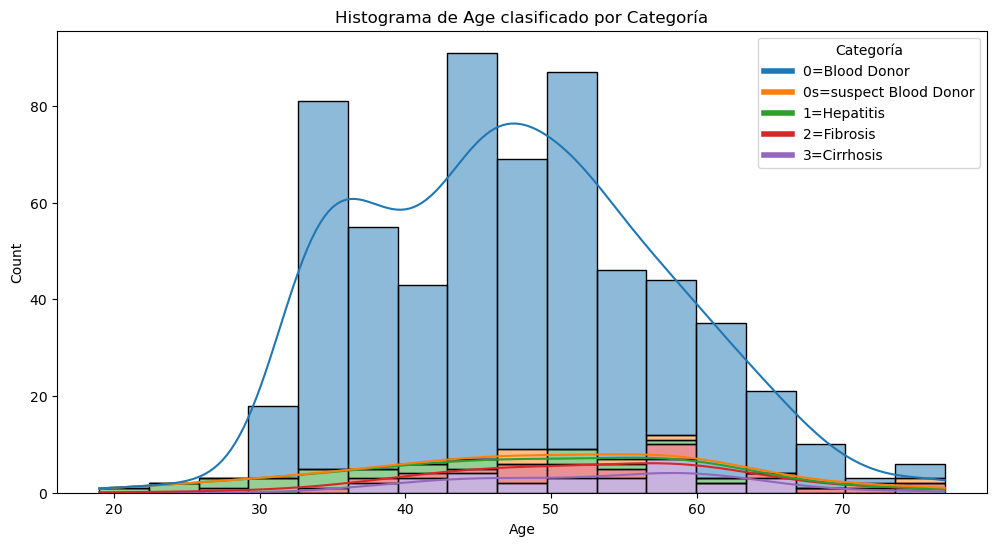

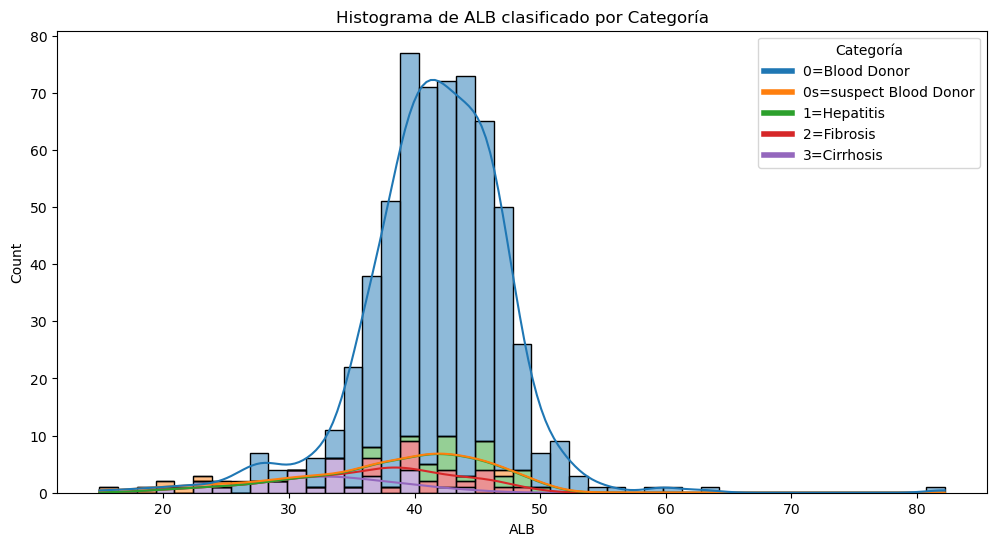

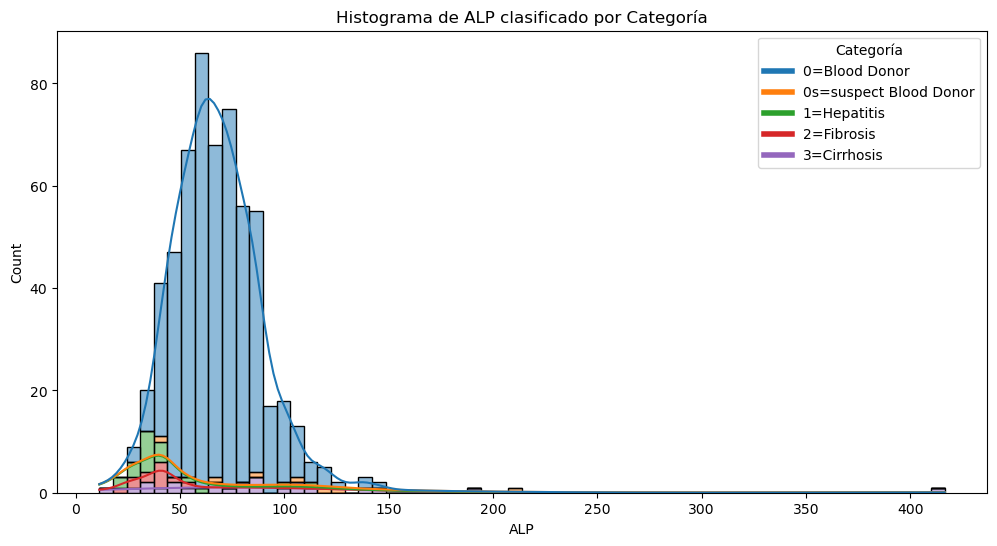

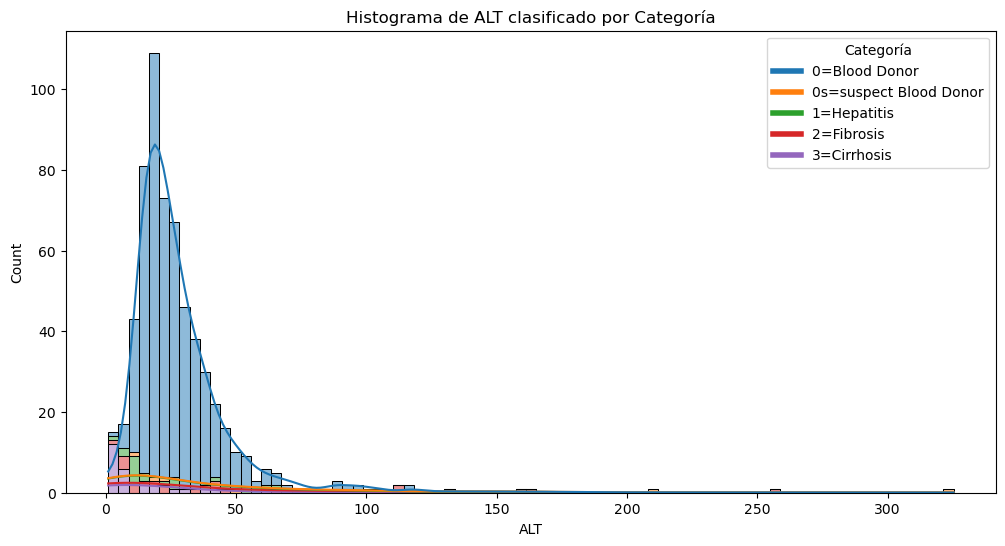

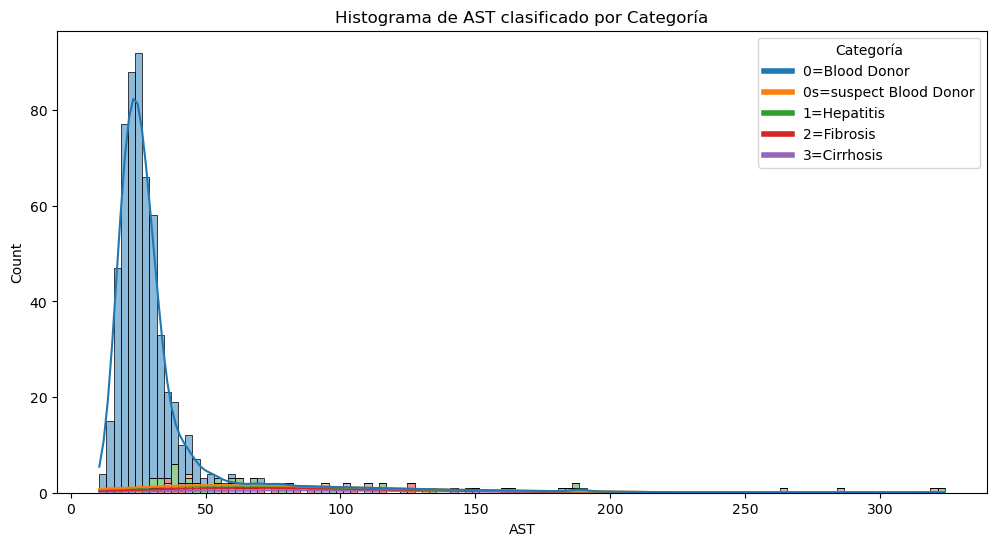

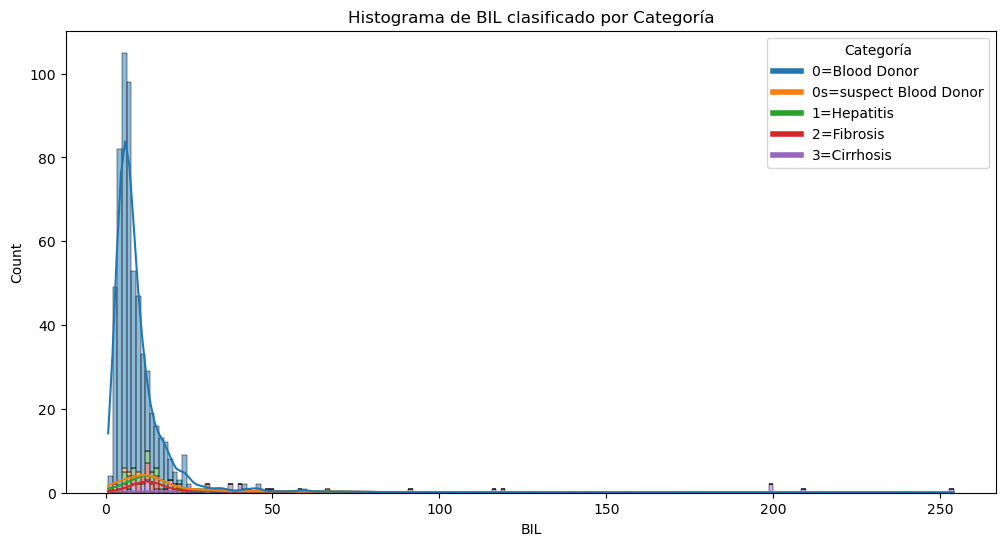

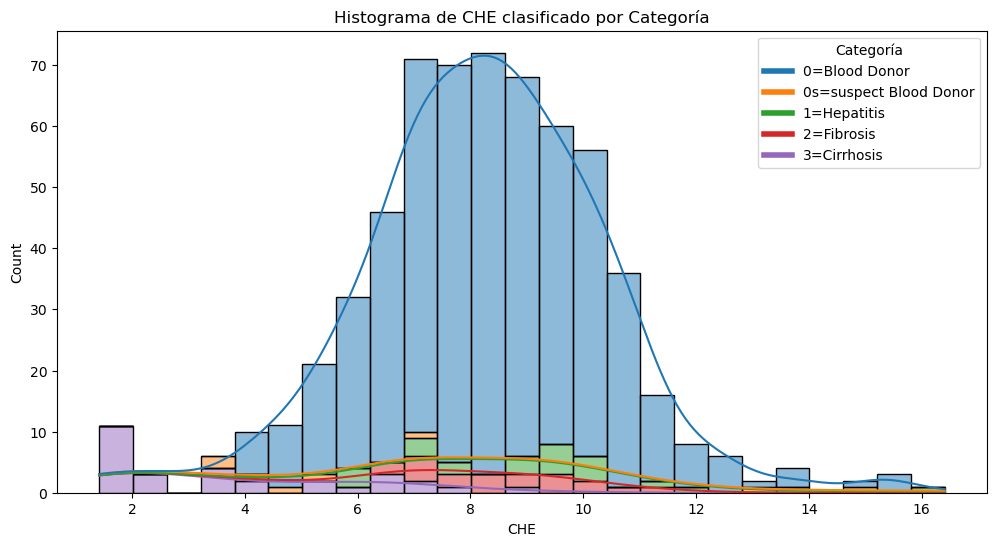

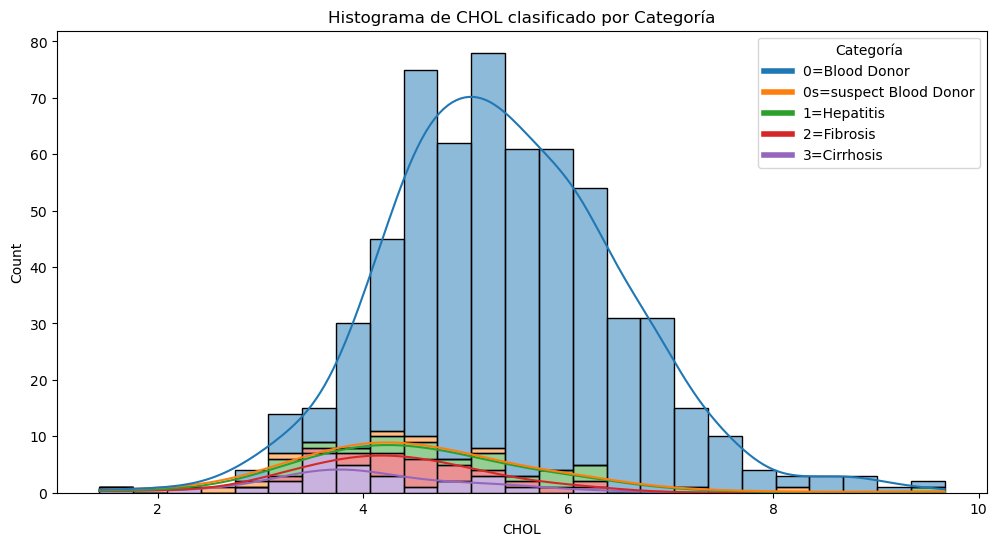

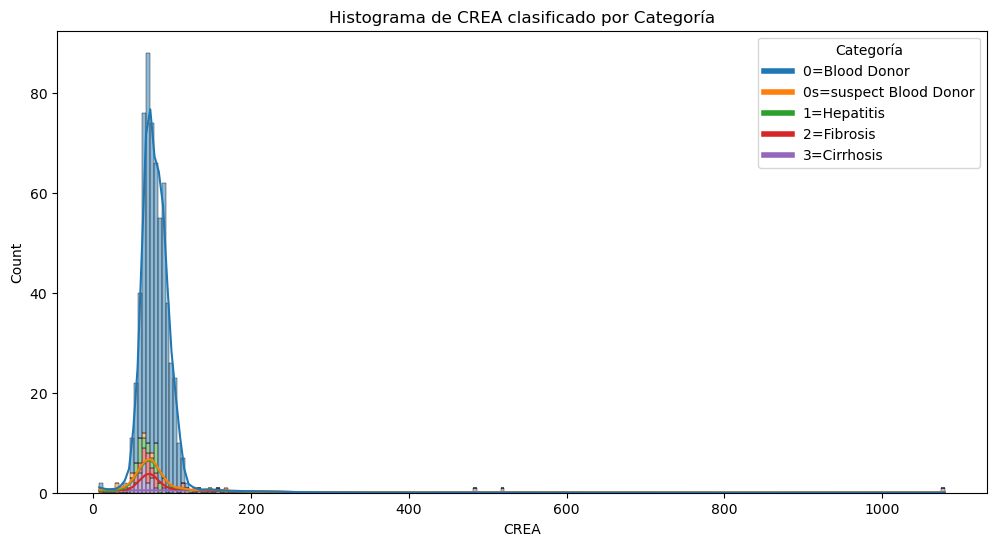

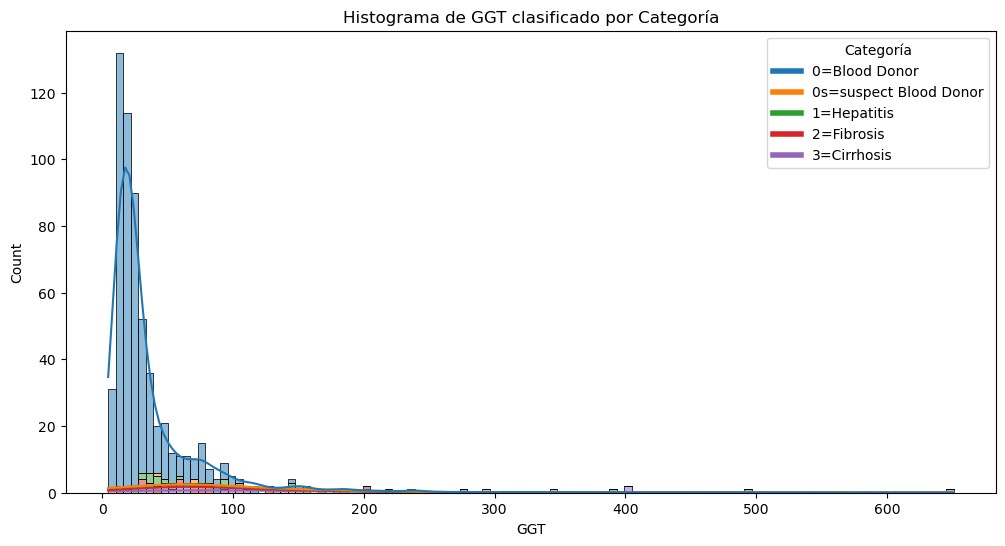

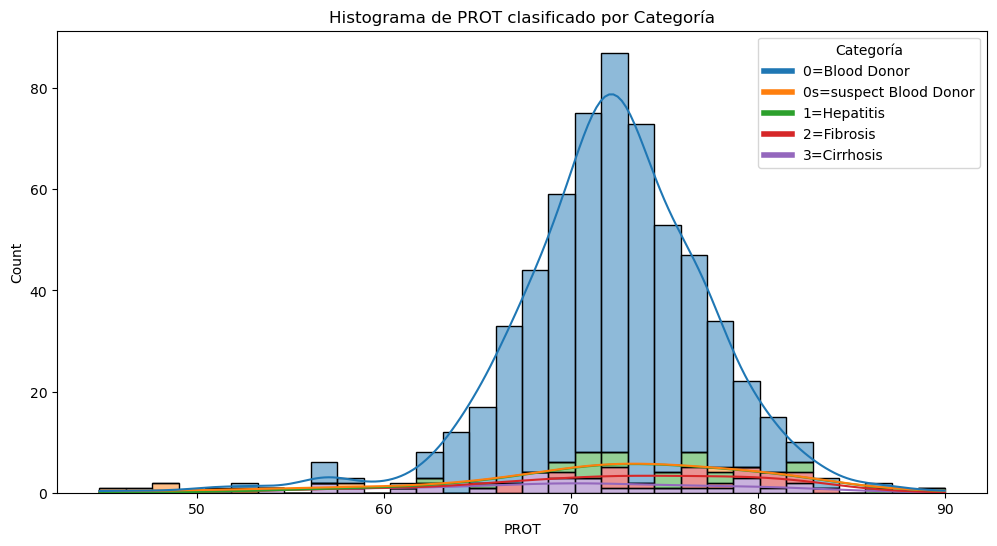

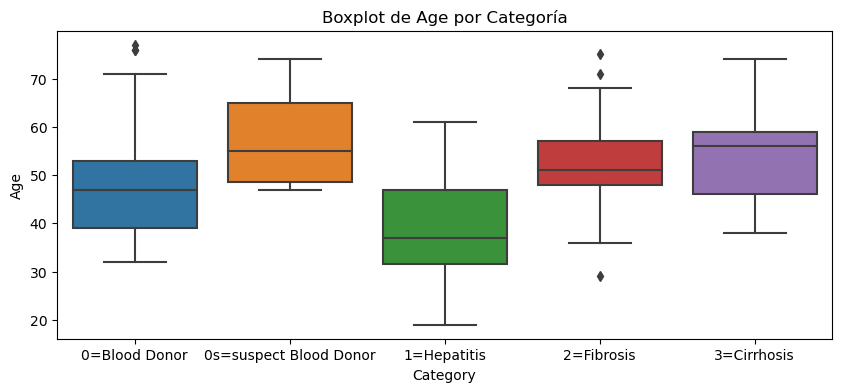

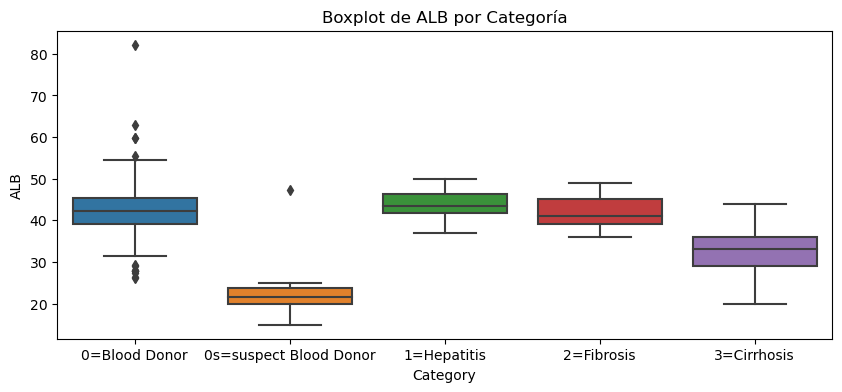

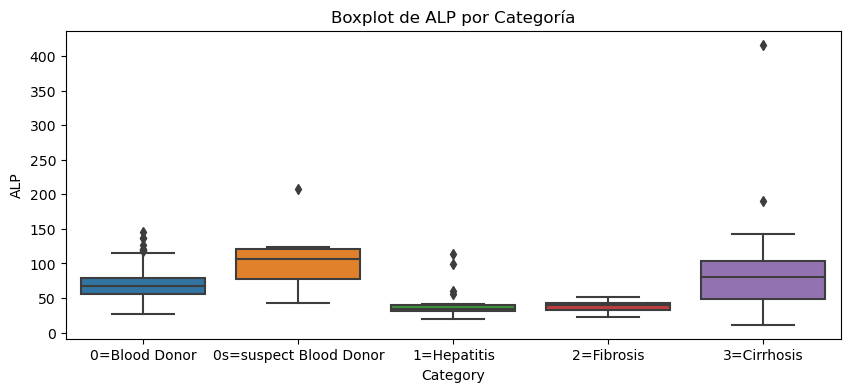

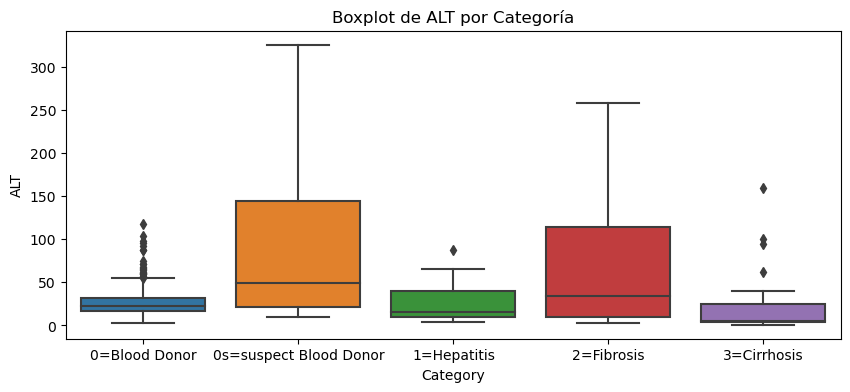

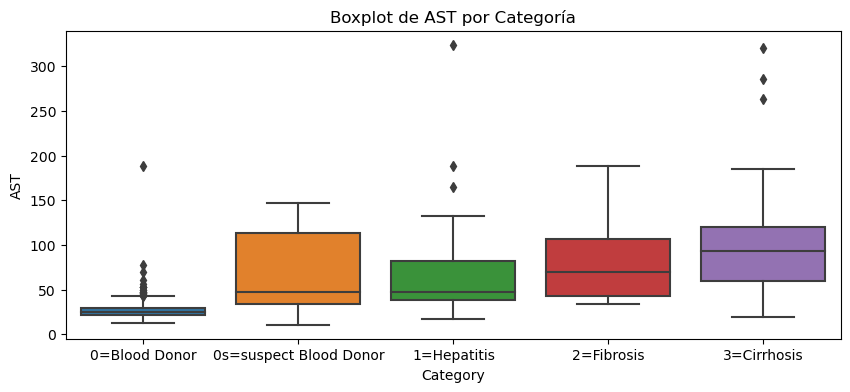

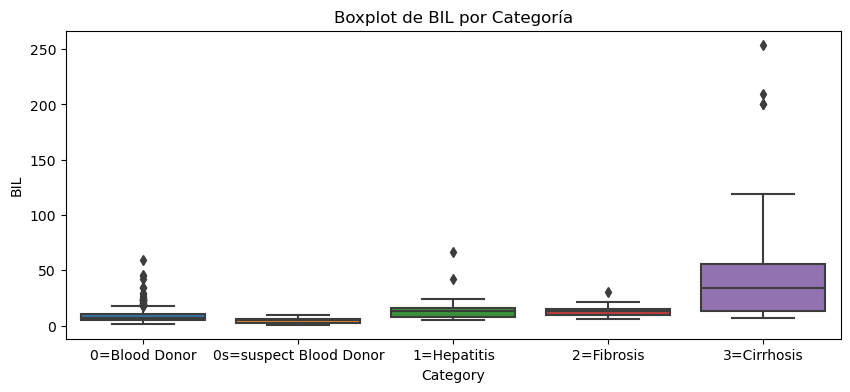

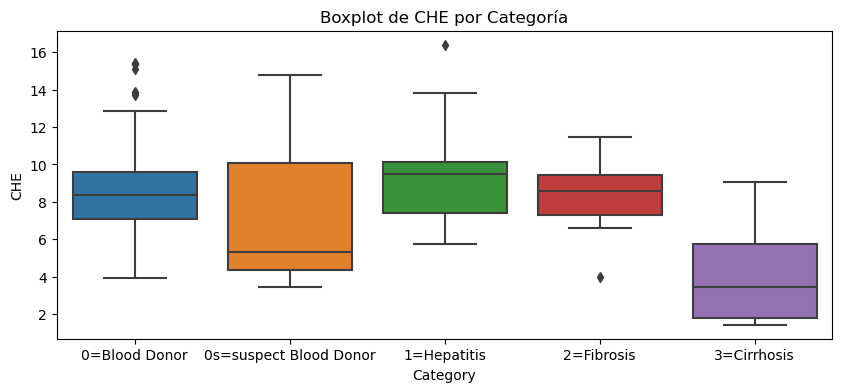

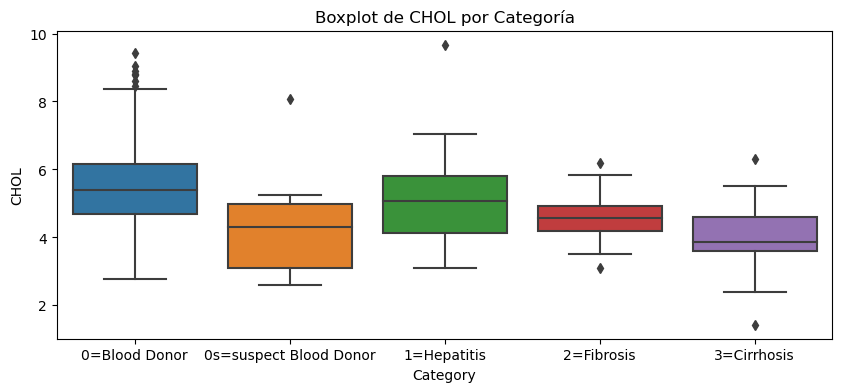

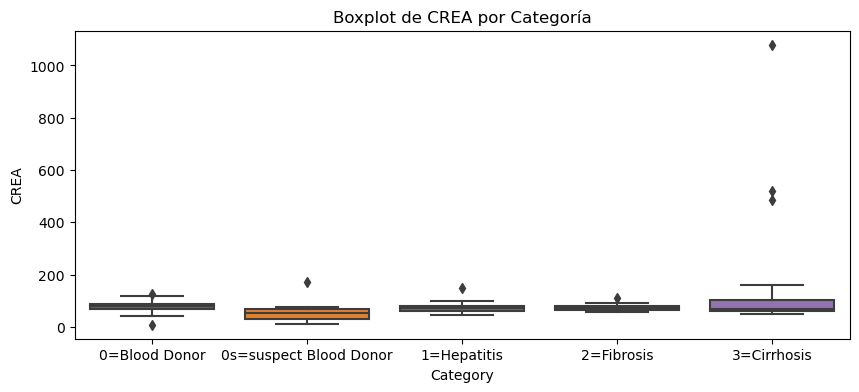

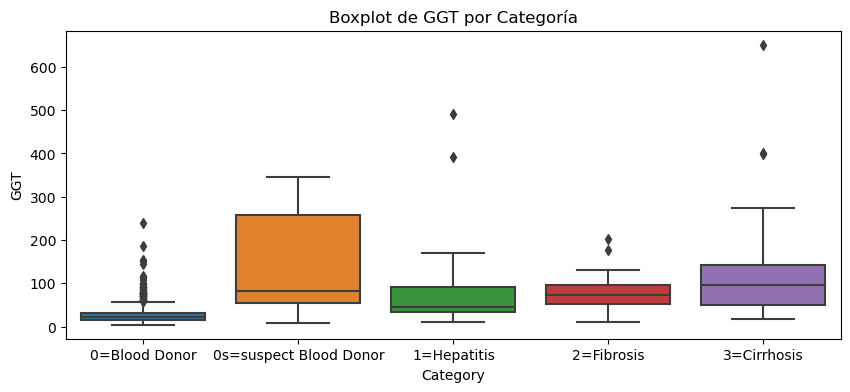

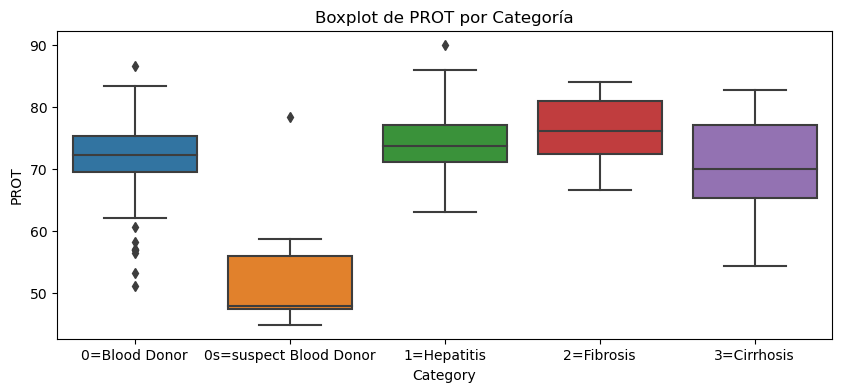

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que ya has cargado los datos en 'data' y has definido 'numerical_vars'

# Definir las variables numéricas
numerical_vars = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Histograma clasificado por categoría
for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    # Crear el histograma
    ax = sns.histplot(data=data, x=var, hue='Category', multiple='stack', kde=True)
    
    # Configurar la leyenda manualmente
    handles, labels = ax.get_legend_handles_labels()
    if not handles:  # Si no se obtienen manejadores, generarlos manualmente
        categories = data['Category'].unique()
        palette = sns.color_palette("tab10", n_colors=len(categories))
        handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(categories))]
        labels = [str(cat) for cat in categories]
    ax.legend(handles=handles, labels=labels, title='Categoría')
    
    plt.title(f'Histograma de {var} clasificado por Categoría')
    plt.show()

# Boxplot
for var in numerical_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Category', y=var, data=data, palette="tab10")
    plt.title(f'Boxplot de {var} por Categoría')
    plt.show()


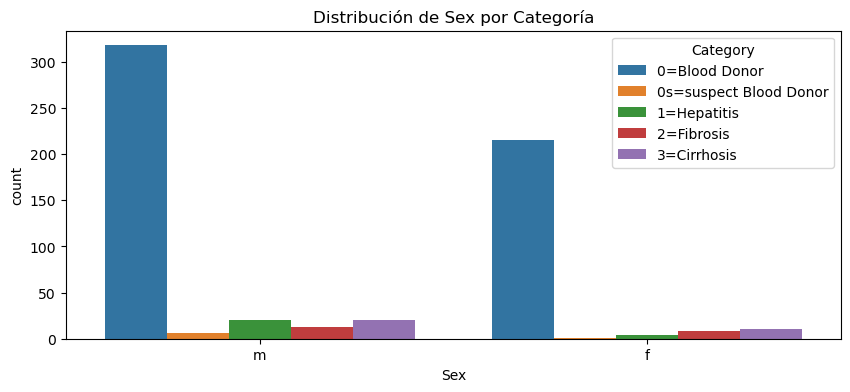

In [3]:
# VARIABLES CATEGÓRICAS
# Gráfico de barras para la variable categórica 'Sex'
plt.figure(figsize=(10, 4))
sns.countplot(x='Sex', hue='Category', data=data)
plt.title('Distribución de Sex por Categoría')
plt.show()


In [4]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

# Definir las categorías y mapearlas
category_map = {'0=Blood Donor': 'Blood Donor', '1=Hepatitis': 'Hepatitis', '2=Fibrosis': 'Fibrosis', '3=Cirrhosis': 'Cirrhosis'}
data['Category'] = data['Category'].map(category_map)

# Filtrar las categorías relevantes
data = data[data['Category'].isin(['Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])]

# Crear un DataFrame vacío para la tabla resumen
summary_table = pd.DataFrame(columns=['Variable', 'Estadístico', 'p-valor'])

# Análisis estadístico para variables numéricas
numerical_vars = data.select_dtypes(include=[np.number]).columns

for var in numerical_vars:
    if var == 'Unnamed: 0':
        continue  # Omite la columna de índice
    
    # Eliminar filas con valores faltantes en la variable actual
    data_filtered = data[['Category', var]].dropna()
    
    if data_filtered.empty:
        print(f'No hay datos suficientes para la variable {var}.')
        continue
    
    blood_donor = data_filtered[data_filtered['Category'] == 'Blood Donor'][var]
    patient = data_filtered[data_filtered['Category'] != 'Blood Donor'][var]
    
    if len(blood_donor) < 2 or len(patient) < 2:
        print(f'No hay suficientes datos para la variable {var}.')
        continue
    
    # Comprobar la normalidad de las distribuciones y seleccionar el test adecuado
    # Aquí estamos utilizando el test t de Student; para distribuciones no normales, puedes usar mannwhitneyu
    try:
        stat, p_value = ttest_ind(blood_donor, patient, nan_policy='omit')
    except ValueError:
        # Si falla el test t, puedes intentar el test Mann-Whitney U
        stat, p_value = mannwhitneyu(blood_donor, patient, alternative='two-sided')
    
    # Agregar los resultados a la tabla resumen
    summary_table = pd.concat([summary_table, pd.DataFrame({'Variable': [var], 'Estadístico': [stat], 'p-valor': [p_value]})], ignore_index=True)

# Análisis estadístico para variables categóricas
from scipy.stats import chi2_contingency

# Verificar si hay valores faltantes en 'Sex'
data = data.dropna(subset=['Sex'])

# Verificar si hay valores únicos en 'Sex' y 'Category'
if data['Sex'].nunique() > 1 and data['Category'].nunique() > 1:
    # Para la variable 'Sex'
    contingency_table = pd.crosstab(data['Sex'], data['Category'])
    if contingency_table.size > 0:
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        # Agregar los resultados a la tabla resumen de variables categóricas
        summary_table = pd.concat([summary_table, pd.DataFrame({'Variable': ['Sex'], 'Estadístico': [chi2], 'p-valor': [p]})], ignore_index=True)
    else:
        print('La tabla de contingencia para la variable Sex está vacía.')

# Mostrar la tabla resumen
print(summary_table)



   Variable  Estadístico       p-valor
0       Age    -1.051184  2.935929e-01
1       ALB     5.241026  2.209079e-07
2       ALP     1.601085  1.098952e-01
3       ALT    -3.041305  2.457502e-03
4       AST   -20.481425  3.025144e-71
5       BIL   -10.667793  1.823974e-24
6       CHE     6.024611  2.942431e-09
7      CHOL     7.095262  3.678192e-12
8      CREA    -3.380966  7.687785e-04
9       GGT   -13.209512  3.428249e-35
10     PROT    -1.907181  5.697044e-02
11      Sex     5.845852  1.193555e-01


In [5]:
# Variables categóricas
# Para las variables categóricas, se usa el test de chi-cuadrado:
from scipy.stats import chi2_contingency

# Tabulación cruzada de Sex y Category
contingency_table = pd.crosstab(data['Sex'], data['Category'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print('Test de Chi-cuadrado para Sex:')
print(f'Estadístico: {chi2}, p-valor: {p}\n')

Test de Chi-cuadrado para Sex:
Estadístico: 5.845852137168629, p-valor: 0.11935549940522991



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # Importar SMOTE
from collections import Counter

# Convertir variables categóricas a numéricas
data['Category'] = data['Category'].map({'Blood Donor': 0, 'Hepatitis': 1, 'Fibrosis': 2, 'Cirrhosis': 3})
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Verificar valores únicos en 'Sex' y 'Category'
print(data['Sex'].value_counts())
print(data['Category'].value_counts())

# Dividir en características (X) y variable objetivo (y)
X = data.drop(columns=['Category'])
y = data['Category']

# Verificar si hay columnas con todos los valores NaN
print("Columnas con todos los valores NaN antes de la imputación:")
print(X.columns[X.isna().all()])

# Eliminar la columna 'Sex' si todos sus valores son NaN
if X['Sex'].isna().all():
    X = X.drop(columns=['Sex'])

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Verificar después de la imputación
print("Datos imputados:")
print(pd.DataFrame(X_imputed, columns=X.columns).isnull().sum())

# Inicializar listas para almacenar resultados
sensitivity_log_reg = []
specificity_log_reg = []
auc_log_reg = []

sensitivity_rf = []
specificity_rf = []
auc_rf = []

sensitivity_svm = []
specificity_svm = []
auc_svm = []

# Función para calcular especificidad
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = np.diag(cm)
    fp = cm.sum(axis=0) - tn
    specificity_per_class = tn / (tn + fp)
    # Reemplazar NaN con 0
    specificity_per_class = np.nan_to_num(specificity_per_class)
    return np.average(specificity_per_class, weights=np.bincount(y_true))

# Realizar 10 iteraciones
for i in range(10):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=i)
    
    # Aplicar SMOTE solo en el conjunto de entrenamiento
    smote = SMOTE(random_state=i)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Normalizar las características numéricas
    scaler = StandardScaler()
    X_train_smote = scaler.fit_transform(X_train_smote)
    X_test = scaler.transform(X_test)
    
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_smote, y_train_smote)
    y_pred_log_reg = log_reg.predict(X_test)
    y_prob_log_reg = log_reg.predict_proba(X_test)
    sensitivity_log_reg.append(recall_score(y_test, y_pred_log_reg, average='weighted'))
    specificity_log_reg.append(specificity_score(y_test, y_pred_log_reg))
    auc_log_reg.append(roc_auc_score(y_test, y_prob_log_reg, multi_class='ovr'))
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_smote, y_train_smote)
    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)
    sensitivity_rf.append(recall_score(y_test, y_pred_rf, average='weighted'))
    specificity_rf.append(specificity_score(y_test, y_pred_rf))
    auc_rf.append(roc_auc_score(y_test, y_prob_rf, multi_class='ovr'))
    
    # Support Vector Machine
    svm = SVC(probability=True)
    svm.fit(X_train_smote, y_train_smote)
    y_pred_svm = svm.predict(X_test)
    y_prob_svm = svm.predict_proba(X_test)
    sensitivity_svm.append(recall_score(y_test, y_pred_svm, average='weighted'))
    specificity_svm.append(specificity_score(y_test, y_pred_svm))
    auc_svm.append(roc_auc_score(y_test, y_prob_svm, multi_class='ovr'))

# Promediar resultados
avg_sensitivity_log_reg = np.mean(sensitivity_log_reg)
avg_specificity_log_reg = np.mean(specificity_log_reg)
avg_auc_log_reg = np.mean(auc_log_reg)

avg_sensitivity_rf = np.mean(sensitivity_rf)
avg_specificity_rf = np.mean(specificity_rf)
avg_auc_rf = np.mean(auc_rf)

avg_sensitivity_svm = np.mean(sensitivity_svm)
avg_specificity_svm = np.mean(specificity_svm)
avg_auc_svm = np.mean(auc_svm)

print("Promedio de Sensibilidad, Especificidad y AUC después de 10 iteraciones:")

print("Logistic Regression:")
print(f"Sensibilidad: {avg_sensitivity_log_reg}")
print(f"Especificidad: {avg_specificity_log_reg}")
print(f"AUC: {avg_auc_log_reg}")

print("Random Forest:")
print(f"Sensibilidad: {avg_sensitivity_rf}")
print(f"Especificidad: {avg_specificity_rf}")
print(f"AUC: {avg_auc_rf}")

print("Support Vector Machine:")
print(f"Sensibilidad: {avg_sensitivity_svm}")
print(f"Especificidad: {avg_specificity_svm}")
print(f"AUC: {avg_auc_svm}")


Series([], Name: count, dtype: int64)
Category
0    533
3     30
1     24
2     21
Name: count, dtype: int64
Columnas con todos los valores NaN antes de la imputación:
Index(['Sex'], dtype='object')
Datos imputados:
Unnamed: 0    0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64
Promedio de Sensibilidad, Especificidad y AUC después de 10 iteraciones:
Logistic Regression:
Sensibilidad: 0.9549180327868851
Especificidad: 0.9648035389018995
AUC: 0.9599987441137092
Random Forest:
Sensibilidad: 0.9877049180327869
Especificidad: 0.989785991497366
AUC: 0.9991611961250106
Support Vector Machine:
Sensibilidad: 0.9631147540983607
Especificidad: 0.965315732601683
AUC: 0.9461456408757289


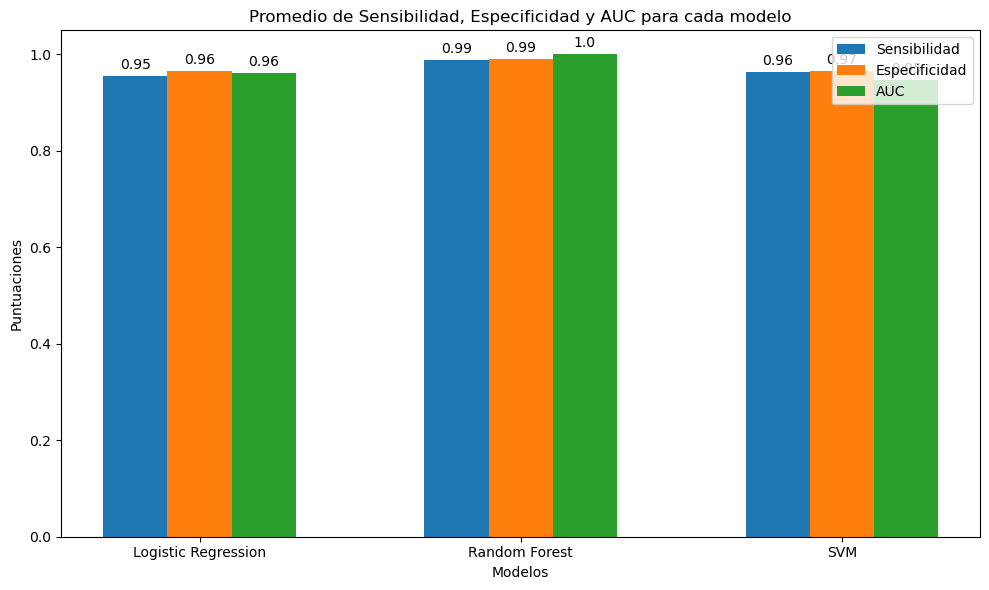

In [7]:
import matplotlib.pyplot as plt

# Datos para el gráfico
models = ['Logistic Regression', 'Random Forest', 'SVM']
sensitivity = [avg_sensitivity_log_reg, avg_sensitivity_rf, avg_sensitivity_svm]
specificity = [avg_specificity_log_reg, avg_specificity_rf, avg_specificity_svm]
auc = [avg_auc_log_reg, avg_auc_rf, avg_auc_svm]

x = np.arange(len(models))  # ubicaciones de las etiquetas
width = 0.2  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, sensitivity, width, label='Sensibilidad')
bars2 = ax.bar(x, specificity, width, label='Especificidad')
bars3 = ax.bar(x + width, auc, width, label='AUC')

# Agregar etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Puntuaciones')
ax.set_title('Promedio de Sensibilidad, Especificidad y AUC para cada modelo')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Mostrar los valores en las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

fig.tight_layout()

plt.show()


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Cargar los datos
data = pd.read_csv('hepatitisC.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo de datos

# Limpiar los datos, eliminando filas con valores nulos en las variables de interés
numerical_vars = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
data = data.dropna(subset=numerical_vars + ['Category'])

# Asegurarse de que las columnas categóricas estén en el formato correcto
data['Category'] = data['Category'].astype(str)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard de Histogramas y Boxplots"),
    dcc.Dropdown(
        id='variable-dropdown',
        options=[{'label': var, 'value': var} for var in numerical_vars],
        value=numerical_vars[0]
    ),
    dcc.Graph(id='histogram'),
    dcc.Graph(id='boxplot')
])

@app.callback(
    [Output('histogram', 'figure'), Output('boxplot', 'figure')],
    [Input('variable-dropdown', 'value')]
)
def update_graph(selected_var):
    # Crear el histograma
    hist_fig = px.histogram(data, x=selected_var, color='Category', barmode='stack', marginal='rug',
                            title=f'Histograma de {selected_var} clasificado por Categoría')

    # Crear el boxplot
    box_fig = px.box(data, x='Category', y=selected_var, color='Category',
                     title=f'Boxplot de {selected_var} por Categoría')

    return hist_fig, box_fig

if __name__ == '__main__':
    app.run_server(debug=True)
